In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
import dataset as dataset
import datapreparation as datp
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os
import copy
import importlib
import GRU as gru

In [2]:
## reload imports
importlib.reload(datp)
importlib.reload(gru)
data = dataset.pianoroll_dataset_batch("C:\DeepLearning\Master\\neural-composer-assignement\datasets\\training\piano_roll_fs5")
print(torch.cuda.is_available())

True


In [3]:
## Initialize Generalist
## Generalist(input_size, hidden_size, num_tags)
model_generalist = gru.Generalist(128, 256, int(data.num_tags()))
model_generalist.optimizer = torch.optim.Adam(model_generalist.parameters())
model_generalist.loss_log = []

In [107]:
## Initialize Specialist
## Specialist(input_size, hidden_size, num_tags)
model_specialist = gru.Specialist(128, 256, int(data.num_tags()))
#model_specialist.cuda()
#model_specialist.optimizer = torch.optim.Adam(model_specialist.parameters())
model_specialist.loss_log = []

In [ ]:
## Train the generalist
num_epochs = 1000
## Returns state for transferred training
state = gru.train_sequence(model_generalist, num_epochs, data, model_generalist.optimizer, model_generalist.loss_log)

BCE
Epoch: 0
Epoch loss: 7.8082
Epoch: 1
Epoch loss: 3.5450
Epoch: 2
Epoch loss: 3.5341
Epoch: 3
Epoch loss: 3.5412
Epoch: 4
Epoch loss: 3.5385
Epoch: 5
Epoch loss: 3.5346
Epoch: 6
Epoch loss: 3.5285
Epoch: 7
Epoch loss: 3.5337
Epoch: 8
Epoch loss: 3.5470
Epoch: 9
Epoch loss: 3.5190
Epoch: 10
Epoch loss: 3.5289
Epoch: 11
Epoch loss: 3.5239
Epoch: 12
Epoch loss: 3.5192
Epoch: 13
Epoch loss: 3.5156
Epoch: 14
Epoch loss: 3.5128
Epoch: 15
Epoch loss: 3.5560
Epoch: 16
Epoch loss: 3.5266
Epoch: 17
Epoch loss: 3.5425
Epoch: 18
Epoch loss: 3.5414
Epoch: 19
Epoch loss: 3.5278
Epoch: 20
Epoch loss: 3.5134
Epoch: 21
Epoch loss: 3.5375
Epoch: 22
Epoch loss: 3.5188
Epoch: 23
Epoch loss: 3.5213
Epoch: 24
Epoch loss: 3.5284
Epoch: 25
Epoch loss: 3.5171
Epoch: 26
Epoch loss: 3.5253
Epoch: 27
Epoch loss: 3.5308
Epoch: 28
Epoch loss: 3.5293
Epoch: 29
Epoch loss: 3.5558
Epoch: 30
Epoch loss: 3.5307
Epoch: 31
Epoch loss: 3.5271
Epoch: 32
Epoch loss: 3.5426
Epoch: 33
Epoch loss: 3.5277
Epoch: 34
Epoch loss

In [ ]:
## Train the specialist
num_epochs = 100
## Returns state for transferred training
state = gru.train_sequence(model_specialist, num_epochs, data, model_specialist.optimizer, model_specialist.loss_log)


In [8]:
## Save the Generalist state
dir_path = os.path.dirname(os.path.realpath(gru.__file__))
torch.save(state, dir_path+'\\Generalist.pt')

## Current best state 1000 epochs, 256 hidden_size.

In [76]:
## Save the Specialist state
dir_path = os.path.dirname(os.path.realpath(gru.__file__))
torch.save(state, dir_path+'\\Specialist.pt')

## Current best state 1000 epochs, 256 hidden_size.

In [10]:
## Print Generalist state
print('Total number of epochs run: ', len(model_generalist.loss_log))
print('Epoch number of lowest loss: ', model_generalist.loss_log.index(min(model_generalist.loss_log)))
print('Loss for best epoch', min(model_generalist.loss_log))

Total number of epochs run:  1000
Epoch number of lowest loss:  989
Loss for best epoch 1.0233720755204558


In [78]:
## Print Specialist state
print('Total number of epochs run: ', len(model_specialist.loss_log))
print('Epoch number of lowest loss: ', model_specialist.loss_log.index(min(model_specialist.loss_log)))
print('Loss for best epoch', min(model_specialist.loss_log))

Total number of epochs run:  1500
Epoch number of lowest loss:  1469
Loss for best epoch 0.8508922294713557


In [4]:
## Load saved weights into Generalist model
#gru.load(model_generalist, model_generalist.optimizer, filename='Generalist.pt')
model_generalist.optimizer = gru.load(model_generalist, filename='Generalist.pt')
## Additional weight setting with dropout used. Different result, but needs to train longer.
#gru.load(model_generalist, model_generalist.optimizer, filename='GeneralistDropout.pt')
#model_generalist.optimizer = gru.load(model_generalist, filename='GeneralistDropout.pt')

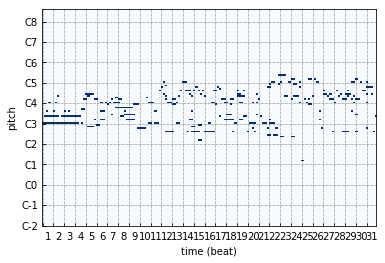

In [8]:
## Generate Generalist music
embed, matrix = gru.gen_music_seconds_smooth(model_generalist, data[0][0] ,composer=0,fs=5,gen_seconds=30,init_seconds=2, device='cpu')
embed



#matrix *= 100
#datp.piano_roll_to_mid_file(matrix,"output.mid",1,74) # 16 Organ

# Export pianoroll as CSV

In [14]:
import numpy
roll = matrix.astype(int)
numpy.savetxt("test.csv", roll, fmt='%i', delimiter=";")

# Convert csv to midi

In [14]:
roll *= 100
datp.piano_roll_to_mid_file(roll,"test2.mid",5,1)

'C:\\DeepLearning\\Master\\neural-composer-assignement\\helpers\\test2.mid'

In [108]:
## Load saved weights into Specialist model
model_specialist.optimizer = gru.load(model_specialist, filename='Specialist.pt', device='cuda')
#model_specialist.optimizer = gru.load(model_specialist, filename='Specialist-256-not-shit.pt', device='cuda')

In [80]:
## Generate Specialist music
embed, matrix = gru.gen_music_seconds_smooth(model_specialist, data[0][0] ,composer=0,fs=5,gen_seconds=40,init_seconds=5, device='cpu')


NameError: name 'model_specialist' is not defined

128


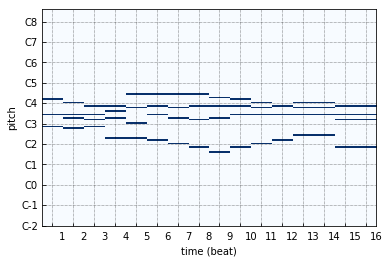

In [3]:
#datp.piano_roll_to_mid_file("C:\DeepLearning\Master\IP\fourpart\test.csv","test",1,11)
data2 = dataset.pianoroll_dataset_batch("C:\DeepLearning\Master\\IP\\fourpart\\output")
print(data2[0][0].shape[2])
#data2.view_pianoroll(0)
datp.visualize_piano_roll(data2.data[0],fs=1)
play, matrix = datp.embed_play_v1(data2.data[0],fs=1)
play

#matrix *= 100
#datp.piano_roll_to_mid_file(matrix,"output.mid",1,74) # 16 Organ

In [11]:
for i in range(1, 5):
    data2 = dataset.pianoroll_dataset_batch("C:\DeepLearning\Master\\IP\\fourpart\\output")
    print(data2[i][0].shape[2])
    play, matrix = datp.embed_play_v1(data2.data[i],fs=1)
    
    
    matrix *= 100
    datp.piano_roll_to_mid_file(matrix,"test"+str(i)+".mid",1,74)

128
128
128
128
